# Describe data used after applying models (HETDEX and Stripe 82)

In [1]:
%matplotlib inline
# Static plots
#%matplotlib ipympl
# Interactive plots
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import mpl_scatter_density
from sklearn.model_selection import train_test_split
from astropy.visualization import LogStretch, PowerStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import colorcet as cc
import cmasher as cmr
import pandas as pd
from chainconsumer import ChainConsumer
import global_variables as gv
import global_functions as gf

In [2]:
mpl.rcdefaults()

In [3]:
plt.rcParams['text.usetex'] = True

---

## Reading data

#### File name

In [4]:
save_plot_flag      = False
use_imputed         = False
plot_area_dens      = True

In [5]:
used_area           = 'S82'  # can be 'S82', 'HETDEX'
HETDEX_subset       = 'all'  # 'training', 'test', 'train_test', 'calibration', 'validation', 'known', 'unknown', 'all'
S82_subset          = 'all'  # 'known', 'unknown', 'all'

In [6]:
if plot_area_dens:
    norm_str            = '_norm'
if not plot_area_dens:
    norm_str            = ''

In [7]:
feats_2_disc_S82    = ['objID', 'RA_MILLI', 'DEC_MILLI', 'W1mag', 'W2mag', 'num_imputed']
feats_2_disc_HETDEX = ['objID', 'RA_MILLI', 'DEC_MILLI', 'W1mag', 'W2mag', 'num_imputed']
feats_2_disc_COSMOS = ['objID', 'RA_MILLI', 'DEC_MILLI', 'W1mag', 'W2mag', 'num_imputed']

feats_2_disc        = {'S82': feats_2_disc_S82, 'HETDEX': feats_2_disc_HETDEX, 'COSMOS': feats_2_disc_COSMOS}
features_2_discard  = feats_2_disc[used_area]
if not use_imputed:
    feats_2_disc_HETDEX.remove('num_imputed')
    feats_2_disc_S82.remove('num_imputed')

In [8]:
if use_imputed:
    file_name_dict      = {'S82': gv.file_S82, 'HETDEX': gv.file_HETDEX, 'COSMOS': gv.file_COSMOS}
    imp_string          = '_imputed'
if not use_imputed:
    file_name_dict      = {'S82': gv.file_non_imp_S82, 'HETDEX': gv.file_non_imp_HETDEX, 'COSMOS': gv.file_non_imp_COSMOS}
    imp_string          = '_nonimputed'
file_name               = file_name_dict[used_area]

if plot_area_dens:
    norm_str            = '_norm'
if not plot_area_dens:
    norm_str            = ''

In [9]:
full_catalog_HETDEX_df  = pd.read_csv(gv.preds_path + f'predicted_rAGN_HETDEX.csv')
full_catalog_S82_df     = pd.read_csv(gv.preds_path + f'predicted_rAGN_S82.csv')

Convert values from `float64` to `float32`.

In [10]:
for col in full_catalog_HETDEX_df.columns:
    if full_catalog_HETDEX_df.loc[:, col].dtype == 'float64':
        full_catalog_HETDEX_df.loc[:, col] = full_catalog_HETDEX_df.loc[:, col].astype('float32')
for col in full_catalog_S82_df.columns:
    if full_catalog_S82_df.loc[:, col].dtype == 'float64':
        full_catalog_S82_df.loc[:, col] = full_catalog_S82_df.loc[:, col].astype('float32')

In [11]:
HETDEX_AGN_filter       = np.array(full_catalog_HETDEX_df.loc[:, 'class'] == 1)
S82_AGN_filter          = np.array(full_catalog_S82_df.loc[:, 'class'] == 1)
HETDEX_gal_filter       = np.array(full_catalog_HETDEX_df.loc[:, 'class'] == 0)
S82_gal_filter          = np.array(full_catalog_S82_df.loc[:, 'class'] == 0)

In [12]:
HETDEX_radio_filter     = np.array(full_catalog_HETDEX_df.loc[:, 'LOFAR_detect'] == 1)
S82_radio_filter        = np.array(full_catalog_S82_df.loc[:, 'LOFAR_detect'] == 1)
HETDEX_noradio_filter   = np.array(full_catalog_HETDEX_df.loc[:, 'LOFAR_detect'] == 0)
S82_noradio_filter      = np.array(full_catalog_S82_df.loc[:, 'LOFAR_detect'] == 0)

In [13]:
HETDEX_pAGN_filter      = np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_class'] == 1)
S82_pAGN_filter         = np.array(full_catalog_S82_df.loc[:, 'pred_prob_class'] == 1)
HETDEX_pgal_filter      = np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_class'] == 0)
S82_pgal_filter         = np.array(full_catalog_S82_df.loc[:, 'pred_prob_class'] == 0)

In [14]:
HETDEX_pradio_filter    = np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_radio'] == 1)
S82_pradio_filter       = np.array(full_catalog_S82_df.loc[:, 'pred_prob_radio'] == 1)
HETDEX_pnoradio_filter  = np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_radio'] == 0)
S82_pnoradio_filter     = np.array(full_catalog_S82_df.loc[:, 'pred_prob_radio'] == 0)

In [15]:
HETDEX_known_filter     = np.array(full_catalog_HETDEX_df.loc[:, 'class'] == 0) | np.array(full_catalog_HETDEX_df.loc[:, 'class'] == 1)
S82_known_filter        = np.array(full_catalog_S82_df.loc[:, 'class'] == 0)    | np.array(full_catalog_S82_df.loc[:, 'class'] == 1)

In [16]:
HETDEX_true_rAGN_filter = np.array(full_catalog_HETDEX_df.loc[:, 'class'] == 1) & np.array(full_catalog_HETDEX_df.loc[:, 'LOFAR_detect'] == 1)
S82_true_rAGN_filter    = np.array(full_catalog_S82_df.loc[:, 'class'] == 1)    & np.array(full_catalog_S82_df.loc[:, 'LOFAR_detect'] == 1)

In [17]:
HETDEX_pred_rAGN_filter = np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_class'] == 1) & np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_radio'] == 1)
S82_pred_rAGN_filter    = np.array(full_catalog_S82_df.loc[:, 'pred_prob_class'] == 1)    & np.array(full_catalog_S82_df.loc[:, 'pred_prob_radio'] == 1)

In [18]:
HETDEX_pred_AGN_norad_filter = np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_class'] == 1) & np.array(full_catalog_HETDEX_df.loc[:, 'pred_prob_radio'] == 0)
S82_pred_AGN_norad_filter    = np.array(full_catalog_S82_df.loc[:, 'pred_prob_class'] == 1)    & np.array(full_catalog_S82_df.loc[:, 'pred_prob_radio'] == 0)

In [19]:
if HETDEX_subset == 'unknown':
    full_catalog_HETDEX_df = full_catalog_HETDEX_df.loc[~HETDEX_known_filter]
elif HETDEX_subset == 'known':
    full_catalog_HETDEX_df = full_catalog_HETDEX_df.loc[HETDEX_known_filter]
elif HETDEX_subset == 'training':
    full_catalog_HETDEX_df = full_catalog_HETDEX_df.loc[HETDEX_known_filter]
    _, full_catalog_HETDEX_df, _, _, _ = gf.split_set(full_catalog_HETDEX_df, [0.2, 0.2, 0.5],\
                                                                               'is_AGN', use_calibration=True)
elif HETDEX_subset == 'test':
    full_catalog_HETDEX_df = full_catalog_HETDEX_df.loc[HETDEX_known_filter]
    _, _, full_catalog_HETDEX_df, _, _ = gf.split_set(full_catalog_HETDEX_df, [0.2, 0.2, 0.5],\
                                                                               'is_AGN', use_calibration=True)
elif HETDEX_subset == 'train_test':
    full_catalog_HETDEX_df = full_catalog_HETDEX_df.loc[HETDEX_known_filter]
    full_catalog_HETDEX_df, _, _, _, _ = gf.split_set(full_catalog_HETDEX_df, [0.2, 0.2, 0.5],\
                                                                               'is_AGN', use_calibration=True)
elif HETDEX_subset == 'calibration':
    full_catalog_HETDEX_df = full_catalog_HETDEX_df.loc[HETDEX_known_filter]
    _, _, _, full_catalog_HETDEX_df, _ = gf.split_set(full_catalog_HETDEX_df, [0.2, 0.2, 0.5],\
                                                                               'is_AGN', use_calibration=True)
elif HETDEX_subset == 'validation':
    full_catalog_HETDEX_df = full_catalog_HETDEX_df.loc[HETDEX_known_filter]
    _, _, _, _, full_catalog_HETDEX_df = gf.split_set(full_catalog_HETDEX_df, [0.2, 0.2, 0.5],\
                                                                               'is_AGN', use_calibration=True)
else:
    pass

In [20]:
if S82_subset == 'unknown':
    full_catalog_S82_df = full_catalog_S82_df.loc[~S82_known_filter]
elif S82_subset == 'known':
    full_catalog_S82_df = full_catalog_S82_df.loc[S82_known_filter]
else:
    pass

In [21]:
print('Shape of used data in HETDEX')
print('-' * 40)
print(f'Selected sub-set is: {HETDEX_subset}')
print(f'Its shape is:        {full_catalog_HETDEX_df.shape}')
print('-' * 40)
print()

Shape of used data in HETDEX
----------------------------------------
Selected sub-set is: all
Its shape is:        (15136878, 36)
----------------------------------------



In [22]:
print('Shape of used data in Stripe 82')
print('-' * 40)
print(f'Selected sub-set is: {S82_subset}')
print(f'Its shape is:        {full_catalog_S82_df.shape}')
print('-' * 40)
print()

Shape of used data in Stripe 82
----------------------------------------
Selected sub-set is: all
Its shape is:        (3590306, 36)
----------------------------------------



---

## Description plots

In [23]:
bands_plot = ['gmag', 'rmag', 'imag', 'zmag', 'ymag', 'Jmag',
              'Hmag', 'Kmag', 'W1mproPM', 'W2mproPM', 'W3mag', 'W4mag']

In [24]:
mag_cols_lim = {'W1mproPM': 20.13, 'W2mproPM': 19.81, 'Sint_LOFAR': 17.52, 'Total_flux_VLASS': 15.21,\
                    'TotalFlux_LoLSS': 12.91, 'Stotal_TGSS': 11.18, 'Fint_VLAS82': 17.86,\
                    'Flux_COSMOSVLA3': 21.25, 'W1mag': 19.6, 'W2mag': 19.34, 'W3mag': 16.67,\
                    'W4mag': 14.62, 'gmag': 23.3, 'rmag': 23.2, 'imag': 23.1, 'zmag': 22.3,\
                    'ymag': 21.4, 'FUVmag': 20.0, 'NUVmag': 21.0, 'FEP': 57.9, 'Jmag': 17.45,\
                    'Hmag': 17.24, 'Kmag': 16.59}  # Proper (5-sigma) limits

for key in mag_cols_lim:
    mag_cols_lim[key] = np.float32(mag_cols_lim[key])

In [25]:
mag_cols_names   = {'W1mproPM': 'W1', 'W2mproPM': 'W2', 'Sint_LOFAR': 'LOFAR', 'Total_flux_VLASS': 'VLASS', 
                  'TotalFlux_LoLSS': 'LoLSS', 'Stotal_TGSS': 'TGSS', 'W1mag': 'W1 (AW)', 
                  'W2mag': 'W2 (AW)', 'W3mag': 'W3', 'W4mag': 'W4', 'gmag': 'g', 'rmag': 'r', 
                  'imag': 'i', 'zmag': 'z', 'ymag': 'y', 'FUVmag': 'FUV', 'NUVmag': 'NUV', 
                  'FEP': 'XMM', 'Jmag': 'J', 'Hmag': 'H', 'Kmag': 'K'}

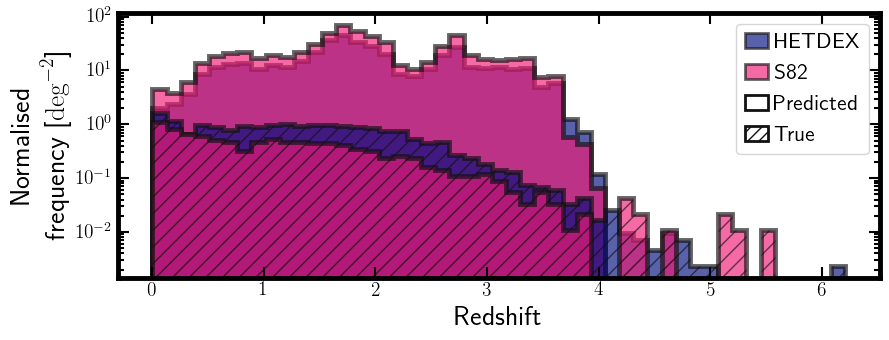

In [26]:
fig             = plt.figure(figsize=(9,3.5))
ax1             = fig.add_subplot(111, xscale='linear', yscale='log')

min_z_HETDEX_pred = full_catalog_HETDEX_df.loc[HETDEX_pred_rAGN_filter * ~HETDEX_known_filter, 'pred_Z'].min()
max_z_HETDEX_pred = full_catalog_HETDEX_df.loc[HETDEX_pred_rAGN_filter * ~HETDEX_known_filter, 'pred_Z'].max()
min_z_HETDEX_true = full_catalog_HETDEX_df.loc[HETDEX_true_rAGN_filter * HETDEX_known_filter, 'Z'].min()
max_z_HETDEX_true = full_catalog_HETDEX_df.loc[HETDEX_true_rAGN_filter * HETDEX_known_filter, 'Z'].max()
min_z_S82_pred    = full_catalog_S82_df.loc[S82_pred_rAGN_filter * ~S82_known_filter, 'pred_Z'].min()
max_z_S82_pred    = full_catalog_S82_df.loc[S82_pred_rAGN_filter * ~S82_known_filter, 'pred_Z'].max()
min_z_S82_true    = full_catalog_S82_df.loc[S82_true_rAGN_filter * S82_known_filter, 'Z'].min()
max_z_S82_true    = full_catalog_S82_df.loc[S82_true_rAGN_filter * S82_known_filter, 'Z'].max()
full_z_bins       = np.linspace(np.nanmin([min_z_HETDEX_pred, min_z_HETDEX_true, min_z_S82_pred, min_z_S82_true]),\
                                np.nanmax([max_z_HETDEX_pred, max_z_HETDEX_true, max_z_S82_pred, max_z_S82_true]), 50)

counts_HETDEX_pred, edges_HETDEX_pred = np.histogram(full_catalog_HETDEX_df.loc[HETDEX_pred_rAGN_filter * ~HETDEX_known_filter, 'pred_Z'], bins=full_z_bins)
counts_S82_pred,    edges_S82_pred    = np.histogram(full_catalog_S82_df.loc[S82_pred_rAGN_filter * ~S82_known_filter, 'pred_Z'], bins=full_z_bins)
counts_HETDEX_true, edges_HETDEX_true = np.histogram(full_catalog_HETDEX_df.loc[HETDEX_true_rAGN_filter * HETDEX_known_filter, 'Z'], bins=full_z_bins)
counts_S82_true,    edges_S82_true    = np.histogram(full_catalog_S82_df.loc[S82_true_rAGN_filter * S82_known_filter, 'Z'], bins=full_z_bins)

ax1.stairs(counts_HETDEX_pred / gv.area_HETDEX, edges_HETDEX_pred, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.0), label='HETDEX', alpha=0.65)
ax1.stairs(counts_S82_pred / gv.area_S82, edges_S82_pred, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.5), label='S82', alpha=0.65)
ax1.stairs(counts_HETDEX_true / gv.area_HETDEX, edges_HETDEX_true, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.0), label='HETDEX', hatch='//', alpha=0.65)
ax1.stairs(counts_S82_true / gv.area_S82, edges_S82_true, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.5), label='S82', hatch='//', alpha=0.65)


HETDEX_patch       = mpatches.Patch(fc=plt.get_cmap('cet_bmy',3)(0.0), ec='k', label='HETDEX', lw=2.0, alpha=0.65)
S82_patch          = mpatches.Patch(fc=plt.get_cmap('cet_bmy',3)(0.5), ec='k', label='S82', lw=2.0, alpha=0.65)
pred_patch         = mpatches.Patch(fc='None', ec='k', label='Predicted', lw=2.0)
true_patch         = mpatches.Patch(fc='None', ec='k', label='True', hatch='///', lw=2.0)
ax1.legend(handles=[HETDEX_patch, S82_patch, pred_patch, true_patch], loc=1, fontsize=16, ncol=1,
              handletextpad=0.3, handlelength=1.0, columnspacing=0.5)

ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
# ax1.set_xlabel('$m_{\mathrm{W1}}\, \mathrm{[AB]}$', size=20)
ax1.set_xlabel('Redshift', size=20)
ax1.set_ylabel('Normalised\nfrequency [$\mathrm{deg}^{-2}$]', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
# plt.legend(loc=1, fontsize=14)
# ax1.set_xlim(left=2.8, right=20.2)
#ax1.set_aspect('equal', 'box')
fig.tight_layout()
if save_plot_flag:
    plt.savefig(gv.plots_path + f'hist_pred_true_z_HETDEX_{HETDEX_subset}_S82{imp_string}.pdf', bbox_inches='tight')
plt.show()

Repeat previous plot (colour-colour) but with highly-relevant features from models.

In [27]:
mag_cols_names   = {'W1': 'W1mproPM', 'W2': 'W2mproPM', 'W3': 'W3mag', 'W4': 'W4mag',\
                    'g': 'gmag', 'r': 'rmag', 'i': 'imag', 'z': 'zmag', 'y': 'ymag',\
                    'J': 'Jmag', 'H': 'Hmag', 'K': 'Kmag'}

In [28]:
colours_list   = ['W1_W2', 'r_z', 'g_r', 'W1_W3', 'y_W2', 'g_J', 'r_i', 'r_W1',\
                  'i_y', 'z_y', 'i_z', 'y_J', 'K_W3', 'H_K', 'J_H', 'W2_W3', 'z_W1',\
                  'y_W1', 'K_W4', 'g_W1',]

In [29]:
cols_pairplot = ['band_num', 'W4mag', 'Kmag', 'g_r', 'g_i', 'g_J', 
                 'r_i', 'r_z',  'r_J', 'r_W1', 'i_z', 'i_y', 
                 'z_y', 'z_W1', 'y_J', 'y_W1', 'y_W2',  'J_H', 
                 'K_W3', 'K_W4', 'H_K', 'H_W3', 'W1_W2', 'W1_W3', 
                 'W2_W3', 'W3_W4', 'pred_Z']  # All features used in three models plus predicted redshift

Create colours

In [30]:
for colour in colours_list:
    full_catalog_HETDEX_df[colour] = full_catalog_HETDEX_df.loc[:, mag_cols_names[colour.split('_')[0]]] -\
    full_catalog_HETDEX_df.loc[:, mag_cols_names[colour.split('_')[1]]]
    full_catalog_S82_df[colour] = full_catalog_S82_df.loc[:, mag_cols_names[colour.split('_')[0]]] -\
    full_catalog_S82_df.loc[:, mag_cols_names[colour.split('_')[1]]]

Plot histograms (distributions) from all features separated by target (classification)

Histograms are normalised and log-scaled (in the Y axis).

Stripe 82 - Predicted AGN/Galaxy.

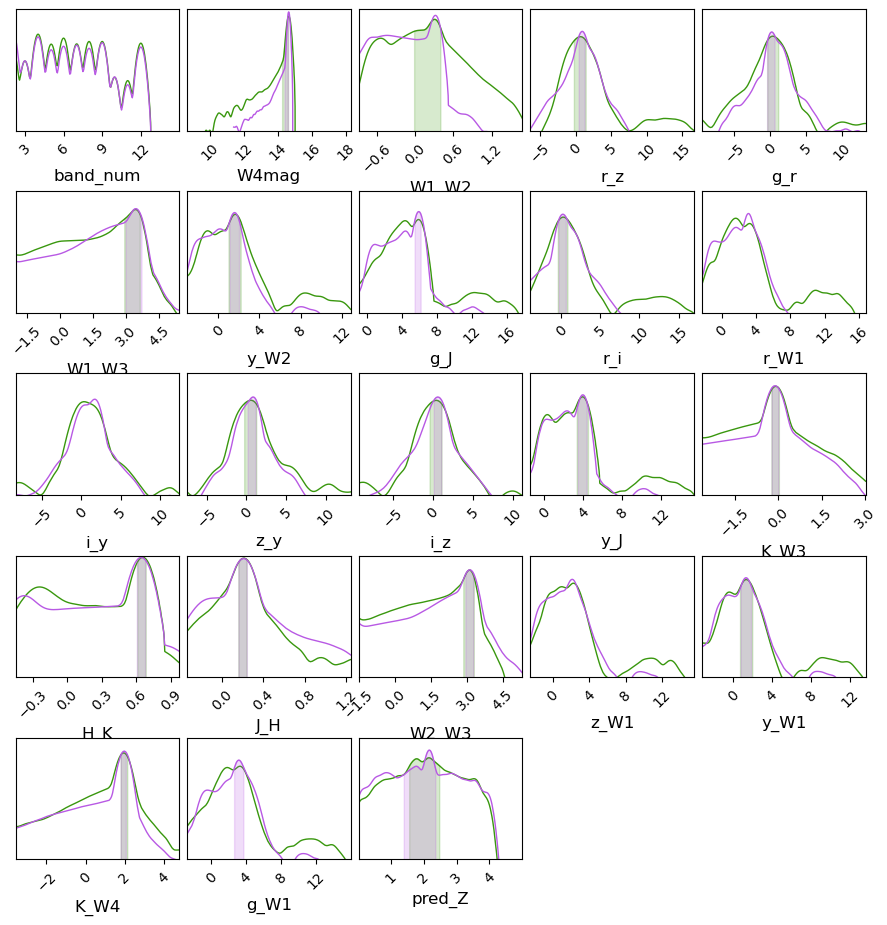

In [31]:
fig = ChainConsumer()\
        .add_chain(full_catalog_S82_df.loc[S82_pAGN_filter, cols_pairplot], name='Stripe 82 predicted AGN')\
        .add_chain(full_catalog_S82_df.loc[S82_pgal_filter, cols_pairplot], name='Stripe 82 predicted Galaxies')\
        .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
        .plotter.plot_distributions(col_wrap=5, log_scales=False, display=False)  # Green AGN
for ax_fig in fig.axes:
    ax_fig.set_yscale('log')
    ax_fig.set_ylim(bottom=1e-5, top=1e1)
    x_lims_tmp = ax_fig.get_xlim()
    ax_fig.set_xlim(left=x_lims_tmp[0] * 0.75, right=x_lims_tmp[1] * 1.25)
    ax_fig.set_yticks([])
plt.show()

HETDEX - Predicted AGN/Galaxy.

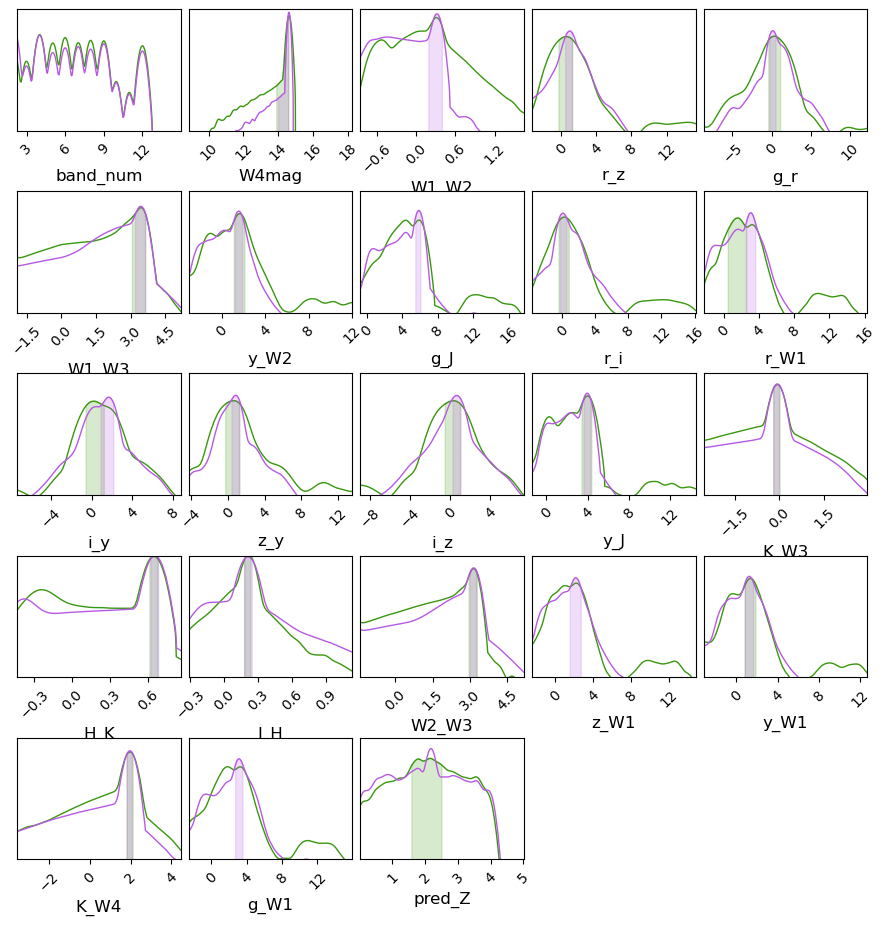

In [32]:
fig = ChainConsumer()\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pAGN_filter, cols_pairplot], name='HETDEX Predicted AGN')\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pgal_filter, cols_pairplot], name='HETDEX Predicted Galaxies')\
        .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
        .plotter.plot_distributions(col_wrap=5, log_scales=False, display=False)  # Green AGN
for ax_fig in fig.axes:
    ax_fig.set_yscale('log')
    ax_fig.set_ylim(bottom=1e-5, top=1e1)
    x_lims_tmp = ax_fig.get_xlim()
    ax_fig.set_xlim(left=x_lims_tmp[0] * 0.75, right=x_lims_tmp[1] * 1.25)
    ax_fig.set_yticks([])
plt.show()

Stripe 82 - Predicted Radio detection.

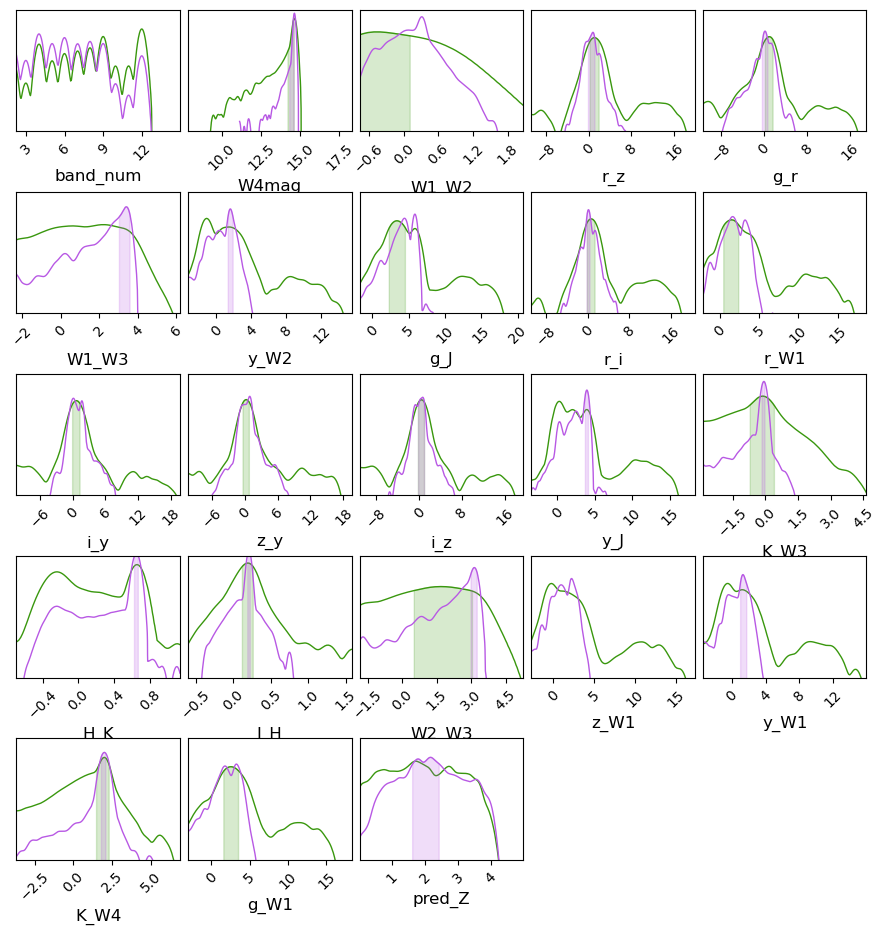

In [33]:
fig = ChainConsumer()\
        .add_chain(full_catalog_S82_df.loc[S82_pAGN_filter * S82_pradio_filter, cols_pairplot], name='Stripe 82 pred AGN pred radio')\
        .add_chain(full_catalog_S82_df.loc[S82_pAGN_filter * S82_pnoradio_filter, cols_pairplot], name='Stripe 82 pred AGN pred no-radio')\
        .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
        .plotter.plot_distributions(col_wrap=5, log_scales=False, display=False)  # Green Radio
for ax_fig in fig.axes:
    ax_fig.set_yscale('log')
    ax_fig.set_ylim(bottom=1e-5, top=1e1)
    x_lims_tmp = ax_fig.get_xlim()
    ax_fig.set_xlim(left=x_lims_tmp[0] * 0.75, right=x_lims_tmp[1] * 1.25)
    ax_fig.set_yticks([])
plt.show()

HETDEX - Predicted Radio detection.

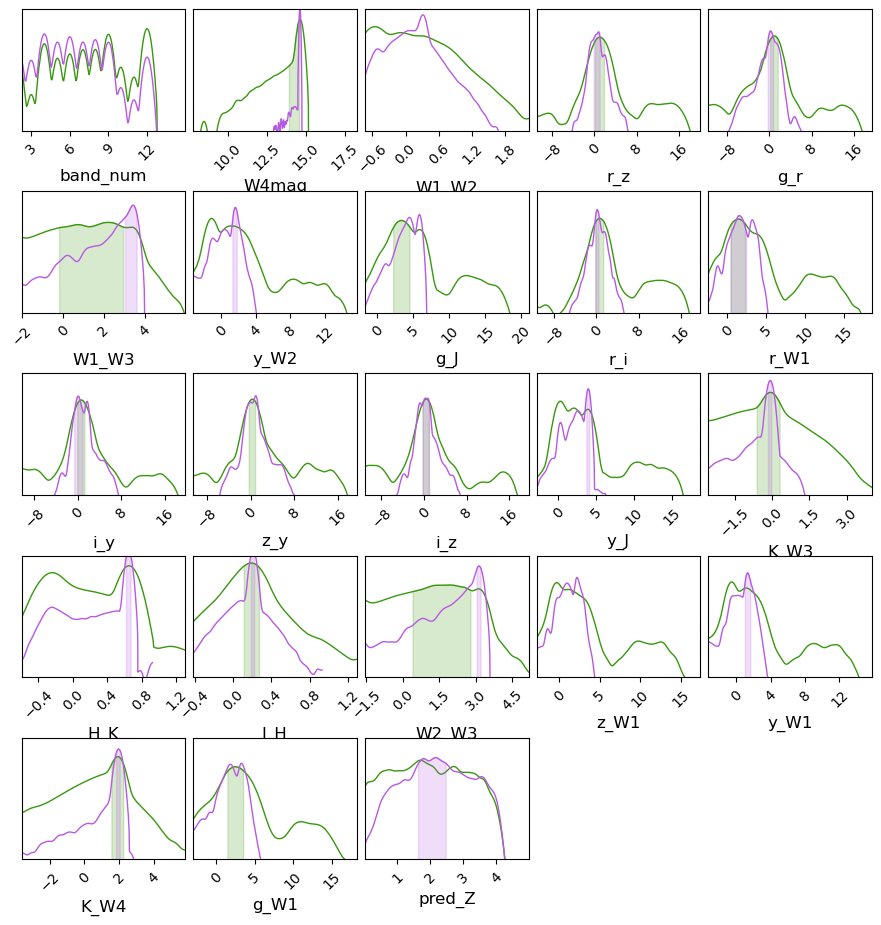

In [34]:
fig = ChainConsumer()\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pAGN_filter * HETDEX_pradio_filter, cols_pairplot], name='HETDEX pred AGN pred radio')\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pAGN_filter * HETDEX_pnoradio_filter, cols_pairplot], name='HETDEX pred AGN pred no-radio')\
        .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
        .plotter.plot_distributions(col_wrap=5, log_scales=False, display=False)  # Green Radio
for ax_fig in fig.axes:
    ax_fig.set_yscale('log')
    ax_fig.set_ylim(bottom=1e-5, top=1e1)
    x_lims_tmp = ax_fig.get_xlim()
    ax_fig.set_xlim(left=x_lims_tmp[0] * 0.75, right=x_lims_tmp[1] * 1.25)
    ax_fig.set_yticks([])
plt.show()

Plot corner plots (contours and histograms) from all features separated by target (classification)

Stripe 82 - Predicted AGN/Galaxy.

In [35]:
# fig = ChainConsumer()\
#         .add_chain(full_catalog_S82_df.loc[S82_pAGN_filter, cols_pairplot], name='Stripe 82 predicted AGN')\
#         .add_chain(full_catalog_S82_df.loc[S82_pgal_filter, cols_pairplot], name='Stripe 82 predicted Galaxies')\
#         .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
#         .plotter.plot()  # Green AGN

HETDEX - Predicted AGN/Galaxy.

In [36]:
# fig = ChainConsumer()\
#         .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pAGN_filter, cols_pairplot], name='HETDEX Predicted AGN')\
#         .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pgal_filter, cols_pairplot], name='HETDEX Predicted Galaxies')\
#         .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
#         .plotter.plot()  # Green AGN

Stripe 82 - Predicted Radio detection.

In [37]:
# fig = ChainConsumer()\
#         .add_chain(full_catalog_S82_df.loc[S82_pAGN_filter * S82_pradio_filter, cols_pairplot], name='Stripe 82 pred AGN pred radio')\
#         .add_chain(full_catalog_S82_df.loc[S82_pAGN_filter * S82_pnoradio_filter, cols_pairplot], name='Stripe 82 pred AGN pred no-radio')\
#         .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
#         .plotter.plot()  # Green AGN

HETDEX - Predicted Radio detection.

In [38]:
# fig = ChainConsumer()\
#         .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pAGN_filter * HETDEX_pradio_filter, cols_pairplot], name='HETDEX pred AGN pred radio')\
#         .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pAGN_filter * HETDEX_pnoradio_filter, cols_pairplot], name='HETDEX pred AGN pred no-radio')\
#         .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)), mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))])\
#         .plotter.plot()  # Green AGN

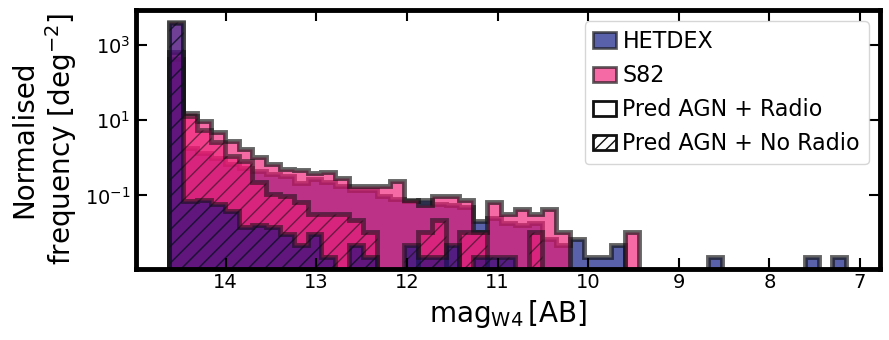

In [39]:
fig             = plt.figure(figsize=(9,3.5))
ax1             = fig.add_subplot(111, xscale='linear', yscale='log')

min_W4_HETDEX_radio = full_catalog_HETDEX_df.loc[HETDEX_pred_rAGN_filter      * ~HETDEX_known_filter, 'W4mag'].min()
max_W4_HETDEX_radio = full_catalog_HETDEX_df.loc[HETDEX_pred_rAGN_filter      * ~HETDEX_known_filter, 'W4mag'].max()
min_W4_HETDEX_norad = full_catalog_HETDEX_df.loc[HETDEX_pred_AGN_norad_filter * ~HETDEX_known_filter, 'W4mag'].min()
max_W4_HETDEX_norad = full_catalog_HETDEX_df.loc[HETDEX_pred_AGN_norad_filter * ~HETDEX_known_filter, 'W4mag'].max()
min_W4_S82_radio    = full_catalog_S82_df.loc[S82_pred_rAGN_filter            * ~S82_known_filter, 'W4mag'].min()
max_W4_S82_radio    = full_catalog_S82_df.loc[S82_pred_rAGN_filter            * ~S82_known_filter, 'W4mag'].max()
min_W4_S82_norad    = full_catalog_S82_df.loc[S82_pred_AGN_norad_filter       * ~S82_known_filter, 'W4mag'].min()
max_W4_S82_norad    = full_catalog_S82_df.loc[S82_pred_AGN_norad_filter       * ~S82_known_filter, 'W4mag'].max()
full_W4_bins        = np.linspace(np.nanmin([min_W4_HETDEX_radio, min_W4_HETDEX_norad, min_W4_S82_radio, min_W4_S82_norad]),\
                                  np.nanmax([max_W4_HETDEX_radio, max_W4_HETDEX_norad, max_W4_S82_radio, max_W4_S82_norad]), 50)

counts_HETDEX_radio, edges_HETDEX_radio = np.histogram(full_catalog_HETDEX_df.loc[HETDEX_pred_rAGN_filter * ~HETDEX_known_filter, 'W4mag'], bins=full_W4_bins)
counts_S82_radio,    edges_S82_radio    = np.histogram(full_catalog_S82_df.loc[S82_pred_rAGN_filter * ~S82_known_filter, 'W4mag'], bins=full_W4_bins)
counts_HETDEX_norad, edges_HETDEX_norad = np.histogram(full_catalog_HETDEX_df.loc[HETDEX_pred_AGN_norad_filter * ~HETDEX_known_filter, 'W4mag'], bins=full_W4_bins)
counts_S82_norad,    edges_S82_norad    = np.histogram(full_catalog_S82_df.loc[S82_pred_AGN_norad_filter * ~S82_known_filter, 'W4mag'], bins=full_W4_bins)

ax1.stairs(counts_HETDEX_radio / gv.area_HETDEX, edges_HETDEX_radio, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.0), label='HETDEX', alpha=0.65)
ax1.stairs(counts_S82_radio / gv.area_S82, edges_S82_radio, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.5), label='S82', alpha=0.65)

ax1.stairs(counts_S82_norad / gv.area_S82, edges_S82_norad, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.5), label='S82', hatch='//', alpha=0.55)
ax1.stairs(counts_HETDEX_norad / gv.area_HETDEX, edges_HETDEX_norad, fill=True, ec='k', lw=3.5,\
           fc=plt.get_cmap('cet_bmy',3)(0.0), label='HETDEX', hatch='//', alpha=0.55)


HETDEX_patch       = mpatches.Patch(fc=plt.get_cmap('cet_bmy',3)(0.0), ec='k', label='HETDEX', lw=2.0, alpha=0.65)
S82_patch          = mpatches.Patch(fc=plt.get_cmap('cet_bmy',3)(0.5), ec='k', label='S82', lw=2.0, alpha=0.65)
radio_patch        = mpatches.Patch(fc='None', ec='k', label='Pred AGN + Radio', lw=2.0)
norad_patch        = mpatches.Patch(fc='None', ec='k', label='Pred AGN + No Radio', hatch='///', lw=2.0)
ax1.legend(handles=[HETDEX_patch, S82_patch, radio_patch, norad_patch], loc=1, fontsize=16, ncol=1,
              handletextpad=0.3, handlelength=1.0, columnspacing=0.5)
ax1.invert_xaxis()
ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
# ax1.set_xlabel('$m_{\mathrm{W1}}\, \mathrm{[AB]}$', size=20)
ax1.set_xlabel('$\mathrm{mag}_{\mathrm{W4}}\,[\mathrm{AB}]$', size=20)
ax1.set_ylabel('Normalised\nfrequency [$\mathrm{deg}^{-2}$]', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
# plt.legend(loc=1, fontsize=14)
# ax1.set_xlim(left=2.8, right=20.2)
#ax1.set_aspect('equal', 'box')
fig.tight_layout()
plt.savefig(gv.plots_path + f'hist_W4_radio_non_radio_HETDEX_{HETDEX_subset}_S82{imp_string}.pdf', bbox_inches='tight')
if save_plot_flag:
    plt.savefig(gv.plots_path + f'hist_W4_radio_non_radio_HETDEX_{HETDEX_subset}_S82{imp_string}.pdf', bbox_inches='tight')
plt.show()

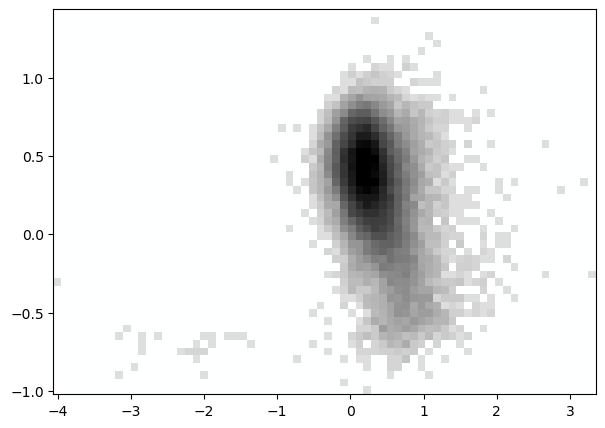

In [40]:
fig_temp             = plt.figure(figsize=(7,5))
ax1_temp             = fig_temp.add_subplot(111, xscale='linear', yscale='linear',  projection='scatter_density')

if not use_imputed:
    filt_plot_HETDEX = np.array(full_catalog_HETDEX_df.loc[:, 'rmag']     != mag_cols_lim['rmag']) &\
                       np.array(full_catalog_HETDEX_df.loc[:, 'zmag']     != mag_cols_lim['zmag']) &\
                       np.array(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM']) &\
                       np.array(full_catalog_HETDEX_df.loc[:, 'W2mproPM'] != mag_cols_lim['W2mproPM'])
    
if use_imputed:
    filt_plot_HETDEX = np.isfinite(full_catalog_HETDEX_df.loc[:, 'rmag'])     &\
                       np.isfinite(full_catalog_HETDEX_df.loc[:, 'zmag'])     &\
                       np.isfinite(full_catalog_HETDEX_df.loc[:, 'W1mproPM']) &\
                       np.isfinite(full_catalog_HETDEX_df.loc[:, 'W2mproPM'])

filt_agn_HETDEX      = np.array(full_catalog_HETDEX_df.loc[:, 'class'] == 1)

norm_dens_HETDEX_tmp = ImageNormalize(vmin=0, vmax=500, stretch=PowerStretch(0.35))

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    dens_agn_HETDEX  = ax1_temp.scatter_density((full_catalog_HETDEX_df.loc[filt_agn_HETDEX & filt_plot_HETDEX, 'rmag'] -\
                                                 full_catalog_HETDEX_df.loc[filt_agn_HETDEX & filt_plot_HETDEX, 'zmag']),\
                                                (full_catalog_HETDEX_df.loc[filt_agn_HETDEX & filt_plot_HETDEX, 'W1mproPM'] -\
                                                 full_catalog_HETDEX_df.loc[filt_agn_HETDEX & filt_plot_HETDEX, 'W2mproPM']),\
                                                 cmap=plt.get_cmap('cet_gray_r'), zorder=0, dpi=15, alpha=1.0, norm=norm_dens_HETDEX_tmp)

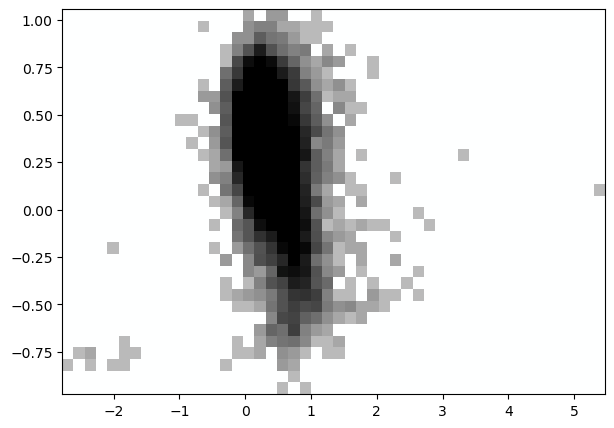

In [41]:
fig_temp             = plt.figure(figsize=(7,5))
ax1_temp             = fig_temp.add_subplot(111, xscale='linear', yscale='linear',  projection='scatter_density')

if not use_imputed:
    filt_plot_S82 = np.array(full_catalog_S82_df.loc[:, 'rmag']     != mag_cols_lim['rmag'])     &\
                    np.array(full_catalog_S82_df.loc[:, 'zmag']     != mag_cols_lim['zmag'])     &\
                    np.array(full_catalog_S82_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM']) &\
                    np.array(full_catalog_S82_df.loc[:, 'W2mproPM'] != mag_cols_lim['W2mproPM'])
if use_imputed:
    filt_plot_S82 = np.isfinite(full_catalog_S82_df.loc[:, 'rmag']) &\
                    np.isfinite(full_catalog_S82_df.loc[:, 'zmag']) &\
                    np.isfinite(full_catalog_S82_df.loc[:, 'W1mproPM'])    &\
                    np.isfinite(full_catalog_S82_df.loc[:, 'W2mproPM'])
filt_agn_S82  = np.array(full_catalog_S82_df.loc[:, 'class'] == 1)

norm_dens_S82_tmp = ImageNormalize(vmin=0, vmax=55, stretch=PowerStretch(0.35))

if np.sum(filt_agn_S82 & filt_plot_S82) > 0:
    dens_agn_S82  = ax1_temp.scatter_density((full_catalog_S82_df.loc[filt_agn_S82 & filt_plot_S82, 'rmag'] -\
                                              full_catalog_S82_df.loc[filt_agn_S82 & filt_plot_S82, 'zmag']),\
                                             (full_catalog_S82_df.loc[filt_agn_S82 & filt_plot_S82, 'W1mproPM'] -\
                                              full_catalog_S82_df.loc[filt_agn_S82 & filt_plot_S82, 'W2mproPM']),\
                                              cmap=plt.get_cmap('cet_gray_r'), zorder=0, dpi=10, alpha=1.0, norm=norm_dens_S82_tmp)

In [42]:
num_contour_levels_HETDEX = 10
num_contour_levels_S82    = 8
type_of_levels            = 'log'  # 'log', 'linear'

In [43]:
print('For the following plot, HETDEX contour levels will be located at:')
if type_of_levels  == 'linear':
    tmp_levs_HETDEX = np.linspace(5, 10**(np.log10(np.nanmax(dens_agn_HETDEX.get_array()))), num_contour_levels_HETDEX)
if type_of_levels  == 'log':
    tmp_levs_HETDEX = np.logspace(np.log10(5), np.log10(np.nanmax(dens_agn_HETDEX.get_array())), num_contour_levels_HETDEX)
tmp_levs_HETDEX = np.ceil(tmp_levs_HETDEX)
tmp_levs_HETDEX[num_contour_levels_HETDEX - 1] -= tmp_levs_HETDEX[num_contour_levels_HETDEX - 1] %\
                                                10**np.floor(np.log10(tmp_levs_HETDEX[num_contour_levels_HETDEX - 1]))
print(tmp_levs_HETDEX)

For the following plot, HETDEX contour levels will be located at:
[  6.   9.  15.  25.  43.  73. 124. 212. 361. 600.]


In [44]:
print('For the following plot, S82 contour levels will be located at:')
if type_of_levels  == 'linear':
    tmp_levs_S82 = np.linspace(5, 10**(np.log10(np.nanmax(dens_agn_S82.get_array()))), num_contour_levels_S82)
if type_of_levels  == 'log':
    tmp_levs_S82 = np.logspace(np.log10(5), np.log10(np.nanmax(dens_agn_S82.get_array())), num_contour_levels_S82)
tmp_levs_S82 = np.ceil(tmp_levs_S82)
tmp_levs_S82[num_contour_levels_S82 - 1] -= tmp_levs_S82[num_contour_levels_S82 - 1] %\
                                            10**np.floor(np.log10(tmp_levs_S82[num_contour_levels_S82 - 1]))
print(tmp_levs_S82)

For the following plot, S82 contour levels will be located at:
[  6.  10.  17.  31.  56. 101. 184. 300.]


In [45]:
dens_clb_in = True  # Plot colorbar for density outside of inside axes.

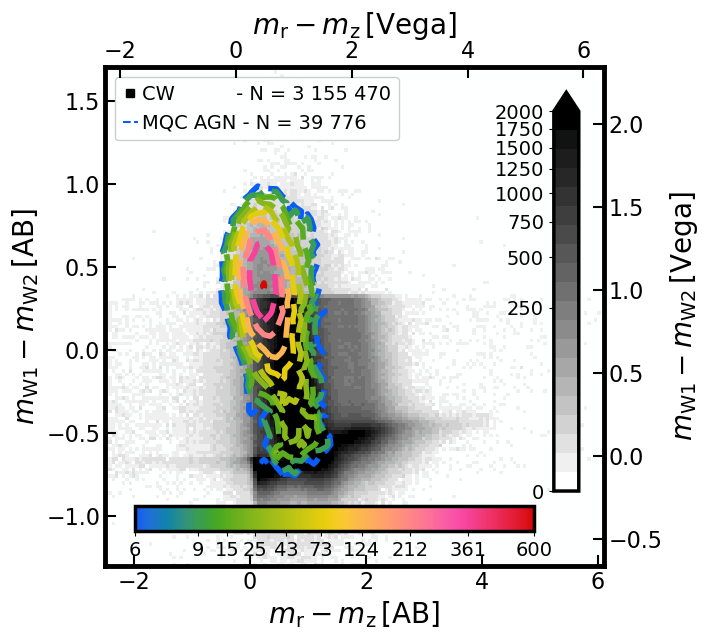

In [46]:
if not dens_clb_in:
    fig                = plt.figure(figsize=(9,6.5))
if dens_clb_in:
    fig                = plt.figure(figsize=(7.2,6.5))
ax1                = fig.add_subplot(111, xscale='linear', yscale='linear', projection='scatter_density')

num_levels_dens    = 20
cmap_dens          = 'cet_gray_r'
cmap_cont          = 'cet_CET_R3'
cmap_agn           = 'cet_CET_C9'

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    if type_of_levels  == 'linear':
        contour_levels_HETDEX = np.linspace(5, 10**(np.log10(np.nanmax(dens_agn_HETDEX.get_array()))),\
                                            num_contour_levels_HETDEX)
    if type_of_levels  == 'log':
        contour_levels_HETDEX = np.logspace(np.log10(5),  np.log10(np.nanmax(dens_agn_HETDEX.get_array())),\
                                            num_contour_levels_HETDEX)
    contour_levels_HETDEX[num_contour_levels_HETDEX - 1] -= contour_levels_HETDEX[num_contour_levels_HETDEX - 1] %\
                                                    10**np.floor(np.log10(contour_levels_HETDEX[num_contour_levels_HETDEX - 1]))
    contour_levels_HETDEX = np.unique(np.ceil(contour_levels_HETDEX))
    
AB_lims_x          = (-2.5, 6.1)
AB_lims_y          = (-1.3, 1.7)


norm_val  = mcolors.CenteredNorm(vcenter=0.5)
norm_dens = ImageNormalize(vmin=0, vmax=2000, stretch=PowerStretch(0.35))

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    norm_cont      = ImageNormalize(vmin=contour_levels_HETDEX[0], vmax=contour_levels_HETDEX[-1], stretch=PowerStretch(0.35))

filt_bands         = np.array(full_catalog_HETDEX_df.loc[:, 'rmag']     != mag_cols_lim['rmag'])     &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'zmag']     != mag_cols_lim['zmag'])     &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM']) &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM'])

filt_plot          = np.isfinite(full_catalog_HETDEX_df.loc[:, 'rmag']     - full_catalog_HETDEX_df.loc[:, 'zmag']) &\
                     np.isfinite(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] - full_catalog_HETDEX_df.loc[:, 'W2mproPM'])

dens_plot_data_x = (full_catalog_HETDEX_df.loc[filt_bands, 'rmag'] -\
                    full_catalog_HETDEX_df.loc[filt_bands, 'zmag'])[filt_plot]
dens_plot_data_y = (full_catalog_HETDEX_df.loc[filt_bands, 'W1mproPM'] -\
                    full_catalog_HETDEX_df.loc[filt_bands, 'W2mproPM'])[filt_plot]

dens_CW_HETDEX      = ax1.scatter_density(dens_plot_data_x, dens_plot_data_y,
                             cmap=plt.get_cmap(cmap_dens, num_levels_dens),
                             zorder=0, dpi=30, norm=norm_dens, alpha=1.0)
n_sources_HETDEX = int(np.nansum(dens_agn_HETDEX.get_array()))
n_sources_CW     = int(np.nansum(filt_bands[filt_plot]))

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    xx_agn = np.linspace(dens_agn_HETDEX.get_extent()[0],\
                         dens_agn_HETDEX.get_extent()[1],\
                         np.shape(dens_agn_HETDEX.get_array())[1])
    yy_agn = np.linspace(dens_agn_HETDEX.get_extent()[2],\
                         dens_agn_HETDEX.get_extent()[3],\
                         np.shape(dens_agn_HETDEX.get_array())[0])

    cont_HETDEX = ax1.contour(xx_agn, yy_agn, np.flipud(dens_agn_HETDEX.get_array()), levels=contour_levels_HETDEX,\
                         linewidths=4.0, cmap=plt.get_cmap(cmap_cont), linestyles='dashed', zorder=3, norm=norm_cont)
    # ax1.annotate(text=f'N = {n_sources_HETDEX}', xy=(0.5, 0.96), xycoords='axes fraction',\
    #              fontsize=18, ha='center', va='top', path_effects=gf.pe2, zorder=11)
    # fig = ChainConsumer()\
    #     .add_chain(full_catalog_HETDEX_df.loc[HETDEX_AGN_filter, ['r_z', 'W1_W2']], name='HETDEX AGN')\
    #     .add_chain(full_catalog_HETDEX_df.loc[HETDEX_gal_filter, ['r_z', 'W1_W2']], name='HETDEX Galaxies')\
    #     .configure(shade=False, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)),\
    #                                     mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))], sigmas=[0, 1, 2, 3, 4], linewidths=3.5)\
    #     .plotter.plot_contour(ax=ax1, parameter_x='r_z', parameter_y='W1_W2')  # Green AGN

ax1.plot([-3], [-3], marker='s', ls='None', c=plt.get_cmap(cmap_dens)(1.1),    label=f'CW          - N = {n_sources_CW:,}'.replace(',',' '), zorder=0)
if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    ax1.plot([-3], [-3], marker=None, ls='--', c=plt.get_cmap(cmap_cont)(0.0), label=f'MQC AGN - N = {n_sources_HETDEX:,}'.replace(',',' '), zorder=0)

if not dens_clb_in:
    clb = plt.colorbar(dens_1, extend='neither', pad=0.15)
    clb.formatter.set_powerlimits((0, 0))
    clb.ax.tick_params(labelsize=14)
    clb.ax.yaxis.get_offset_text().set_fontsize(14)
    # clb.ax.yaxis.set_offset_position('right')
    clb.ax.yaxis.get_offset_text().set_position((0,0))
    clb.outline.set_linewidth(2.5)
    clb.update_ticks()
    clb.ax.set_ylabel('Elements per pixel', size=16, path_effects=pe2, labelpad=-2)
    ax1.set_xlim(left=AB_lims_x[0], right=AB_lims_x[1])
    ax1.set_ylim(bottom=AB_lims_y[0], top=AB_lims_y[1])
    ax1.legend(loc=2, fontsize=14, ncol=3, columnspacing=.5, handletextpad=0.2, handlelength=0.8)

# vega_shift     = {'W1mproPM': 2.699, 'W2mproPM': 3.339, 'W1mag': 2.699, 'W2mag': 3.339, 'W3mag': 5.174,\
#                   'W4mag': 6.620, 'Jmag': 0.910, 'Hmag': 1.390, 'Kmag': 1.850, 'gmag': 0.4810,\
#                     'rmag': 0.6170, 'imag': 0.7520, 'zmag': 0.8660, 'ymag': 0.9620}

# Colorbar density
if dens_clb_in:
    axins0 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                        loc=1, bbox_to_anchor=(0.9, 0.15, 0.05, 0.80), borderpad=0)
    
    clb_dens    = fig.colorbar(dens_CW_HETDEX, cax=axins0, orientation='vertical',\
                     cmap=plt.get_cmap(cmap_dens, num_levels_dens), norm=norm_dens, extend='max')
    axins0.yaxis.set_ticks_position('left')
    clb_dens.ax.tick_params(labelsize=14)
    clb_dens.outline.set_linewidth(2.5)
    # clb_dens.ax.set_ylabel('Elements per pixel', size=12, path_effects=pe2)
##

# Colorbar contour
axins1 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                    loc=3, bbox_to_anchor=(0.06, 0.07, 0.80, 0.05), borderpad=0)
sm = plt.cm.ScalarMappable(norm=norm_cont, cmap=cont_HETDEX.cmap)
sm.set_array([])
clb_cont    = fig.colorbar(sm, cax=axins1, orientation='horizontal', ticks=cont_HETDEX.levels)
axins1.xaxis.set_ticks_position('bottom')
clb_cont.ax.tick_params(labelsize=14)
clb_cont.outline.set_linewidth(2.5)
##

ax1.set_xlim(AB_lims_x)
ax1.set_ylim(AB_lims_y)

ax2 = ax1.twinx()
ax2.set_ylim(tuple(np.array(ax1.get_ylim()) - 2.699 + 3.339))
ax2.tick_params(which='both', top=False, right=True, direction='in')
ax2.tick_params(which='both', bottom=False, left=False, direction='in')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(which='major', length=8, width=1.5)
ax2.tick_params(which='minor', length=4, width=1.5)
ax2.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[Vega]}$', size=20)

ax3 = ax1.twiny()
ax3.set_xlim(tuple(np.array(ax1.get_xlim()) - 0.617 + 0.866))
ax3.tick_params(which='both', top=True, right=False, direction='in')
ax3.tick_params(which='both', bottom=False, left=False, direction='in')
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(which='major', length=8, width=1.5)
ax3.tick_params(which='minor', length=4, width=1.5)
ax3.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[Vega]}$', size=20)

ax1.tick_params(which='both', top=False, right=False, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[AB]}$', size=20)
ax1.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[AB]}$', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
ax1.legend(loc=2, fontsize=14, ncol=1, columnspacing=.5, handletextpad=0.2, handlelength=0.8, framealpha=0.95)
plt.tight_layout()
if save_plot_flag:
    plt.savefig(gv.plots_path + f'r_z_W1_W2_AGN_HETDEX_{HETDEX_subset}{imp_string}.pdf', bbox_inches='tight')
plt.show()

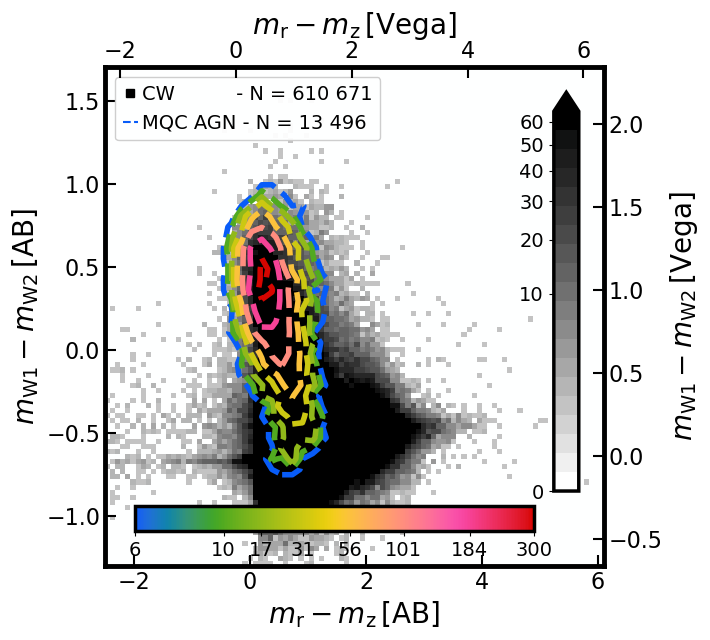

In [47]:
if not dens_clb_in:
    fig                = plt.figure(figsize=(9,6.5))
if dens_clb_in:
    fig                = plt.figure(figsize=(7.2,6.5))
ax1                = fig.add_subplot(111, xscale='linear', yscale='linear', projection='scatter_density')

num_levels_dens    = 20
cmap_dens          = 'cet_gray_r'
cmap_cont          = 'cet_CET_R3'
cmap_agn           = 'cet_CET_C9'
    
if np.sum(filt_agn_S82 & filt_plot_S82) > 0:
    if type_of_levels  == 'linear':
        contour_levels_S82 = np.linspace(5, 10**(np.log10(np.nanmax(dens_agn_S82.get_array()))),\
                                            num_contour_levels_S82)
    if type_of_levels  == 'log':
        contour_levels_S82 = np.logspace(np.log10(5),  np.log10(np.nanmax(dens_agn_S82.get_array())),\
                                            num_contour_levels_S82)
    contour_levels_S82[num_contour_levels_S82 - 1] -= contour_levels_S82[num_contour_levels_S82 - 1] %\
                                                    10**np.floor(np.log10(contour_levels_S82[num_contour_levels_S82 - 1]))
    contour_levels_S82 = np.unique(np.ceil(contour_levels_S82))

AB_lims_x          = (-2.5, 6.1)
AB_lims_y          = (-1.3, 1.7)


norm_val  = mcolors.CenteredNorm(vcenter=0.5)
norm_dens = ImageNormalize(vmin=0, vmax=65, stretch=PowerStretch(0.35))

if np.sum(filt_agn_S82 & filt_plot_S82) > 0:
    norm_cont      = ImageNormalize(vmin=contour_levels_S82[0], vmax=contour_levels_S82[-1], stretch=PowerStretch(0.35))

filt_bands         = np.array(full_catalog_S82_df.loc[:, 'rmag']     != mag_cols_lim['rmag']) &\
                     np.array(full_catalog_S82_df.loc[:, 'zmag']     != mag_cols_lim['zmag']) &\
                     np.array(full_catalog_S82_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM']) &\
                     np.array(full_catalog_S82_df.loc[:, 'W2mproPM'] != mag_cols_lim['W2mproPM'])

filt_plot          = np.isfinite(full_catalog_S82_df.loc[:, 'rmag']     - full_catalog_S82_df.loc[:, 'zmag']) &\
                     np.isfinite(full_catalog_S82_df.loc[:, 'W1mproPM'] - full_catalog_S82_df.loc[:, 'W2mproPM'])

dens_plot_data_x = (full_catalog_S82_df.loc[filt_bands, 'rmag'] -\
                    full_catalog_S82_df.loc[filt_bands, 'zmag'])[filt_plot]
dens_plot_data_y = (full_catalog_S82_df.loc[filt_bands, 'W1mproPM'] -\
                    full_catalog_S82_df.loc[filt_bands, 'W2mproPM'])[filt_plot]

dens_CW_S82 = ax1.scatter_density(dens_plot_data_x, dens_plot_data_y,
                             cmap=plt.get_cmap(cmap_dens, num_levels_dens),
                             zorder=0, dpi=20, norm=norm_dens, alpha=1.0)
n_sources_S82 = int(np.nansum(dens_agn_S82.get_array()))
n_sources_CW  = int(np.nansum(filt_bands[filt_plot]))

if np.sum(filt_agn_S82 & filt_plot_S82) > 0:
    xx_agn = np.linspace(dens_agn_S82.get_extent()[0],\
                         dens_agn_S82.get_extent()[1],\
                         np.shape(dens_agn_S82.get_array())[1])
    yy_agn = np.linspace(dens_agn_S82.get_extent()[2],\
                         dens_agn_S82.get_extent()[3],\
                         np.shape(dens_agn_S82.get_array())[0])

    cont_S82 = ax1.contour(xx_agn, yy_agn, np.flipud(dens_agn_S82.get_array()), levels=contour_levels_S82,\
                         linewidths=4.0, cmap=plt.get_cmap(cmap_cont), linestyles='dashed', zorder=3, norm=norm_cont)
    # ax1.annotate(text=f'N = {n_sources_S82}', xy=(0.5, 0.96), xycoords='axes fraction',\
    #              fontsize=18, ha='center', va='top', path_effects=gf.pe2, zorder=11)

ax1.plot([-3], [-3], marker='s', ls='None', c=plt.get_cmap(cmap_dens)(1.1), label=f'CW          - N = {n_sources_CW:,}'.replace(',',' '), zorder=0)
if np.sum(filt_agn_S82 & filt_plot_S82) > 0:
    ax1.plot([-3], [-3], marker=None, ls='--', c=plt.get_cmap(cmap_cont)(0.0), label=f'MQC AGN - N = {n_sources_S82:,}'.replace(',',' '), zorder=0)

if not dens_clb_in:
    clb = plt.colorbar(dens_S82, extend='neither', pad=0.15)
    clb.formatter.set_powerlimits((0, 0))
    clb.ax.tick_params(labelsize=14)
    clb.ax.yaxis.get_offset_text().set_fontsize(14)
    # clb.ax.yaxis.set_offset_position('right')
    clb.ax.yaxis.get_offset_text().set_position((0,0))
    clb.outline.set_linewidth(2.5)
    clb.update_ticks()
    clb.ax.set_ylabel('Elements per pixel', size=16, path_effects=pe2, labelpad=-2)
    ax1.set_xlim(left=AB_lims_x[0], right=AB_lims_x[1])
    ax1.set_ylim(bottom=AB_lims_y[0], top=AB_lims_y[1])
    ax1.legend(loc=2, fontsize=14, ncol=3, columnspacing=.5, handletextpad=0.2, handlelength=0.8)

# vega_shift     = {'W1mproPM': 2.699, 'W2mproPM': 3.339, 'W1mag': 2.699, 'W2mag': 3.339, 'W3mag': 5.174,\
#                   'W4mag': 6.620, 'Jmag': 0.910, 'Hmag': 1.390, 'Kmag': 1.850, 'gmag': 0.4810,\
#                     'rmag': 0.6170, 'imag': 0.7520, 'zmag': 0.8660, 'ymag': 0.9620}

# Colorbar density
if dens_clb_in:
    axins0 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                        loc=1, bbox_to_anchor=(0.9, 0.15, 0.05, 0.80), borderpad=0)
    
    clb_dens    = fig.colorbar(dens_CW_S82, cax=axins0, orientation='vertical',\
                     cmap=plt.get_cmap(cmap_dens, num_levels_dens), norm=norm_dens, extend='max')
    axins0.yaxis.set_ticks_position('left')
    clb_dens.ax.tick_params(labelsize=14)
    clb_dens.outline.set_linewidth(2.5)
    # clb_dens.ax.set_ylabel('Elements per pixel', size=12, path_effects=pe2)
##

# Colorbar contour
axins1 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                    loc=3, bbox_to_anchor=(0.06, 0.07, 0.80, 0.05), borderpad=0)
sm = plt.cm.ScalarMappable(norm=norm_cont, cmap=cont_S82.cmap)
sm.set_array([])
clb_cont    = fig.colorbar(sm, cax=axins1, orientation='horizontal', ticks=cont_S82.levels)
axins1.xaxis.set_ticks_position('bottom')
clb_cont.ax.tick_params(labelsize=14)
clb_cont.outline.set_linewidth(2.5)
##

ax1.set_xlim(AB_lims_x)
ax1.set_ylim(AB_lims_y)

ax2 = ax1.twinx()
ax2.set_ylim(tuple(np.array(ax1.get_ylim()) - 2.699 + 3.339))
ax2.tick_params(which='both', top=False, right=True, direction='in')
ax2.tick_params(which='both', bottom=False, left=False, direction='in')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(which='major', length=8, width=1.5)
ax2.tick_params(which='minor', length=4, width=1.5)
ax2.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[Vega]}$', size=20)

ax3 = ax1.twiny()
ax3.set_xlim(tuple(np.array(ax1.get_xlim()) - 0.617 + 0.866))
ax3.tick_params(which='both', top=True, right=False, direction='in')
ax3.tick_params(which='both', bottom=False, left=False, direction='in')
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(which='major', length=8, width=1.5)
ax3.tick_params(which='minor', length=4, width=1.5)
ax3.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[Vega]}$', size=20)

ax1.tick_params(which='both', top=False, right=False, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[AB]}$', size=20)
ax1.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[AB]}$', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
ax1.legend(loc=2, fontsize=14, ncol=1, columnspacing=.5, handletextpad=0.2, handlelength=0.8, framealpha=0.95)
plt.tight_layout()
if save_plot_flag:
    plt.savefig(gv.plots_path + f'r_z_W1_W2_AGN_S82_{S82_subset}{imp_string}.pdf', bbox_inches='tight')
plt.show()

### Using `Chainconsumer` package.

Contours at $0, 0.67 (50\%), 1, 2, 3 - \sigma$

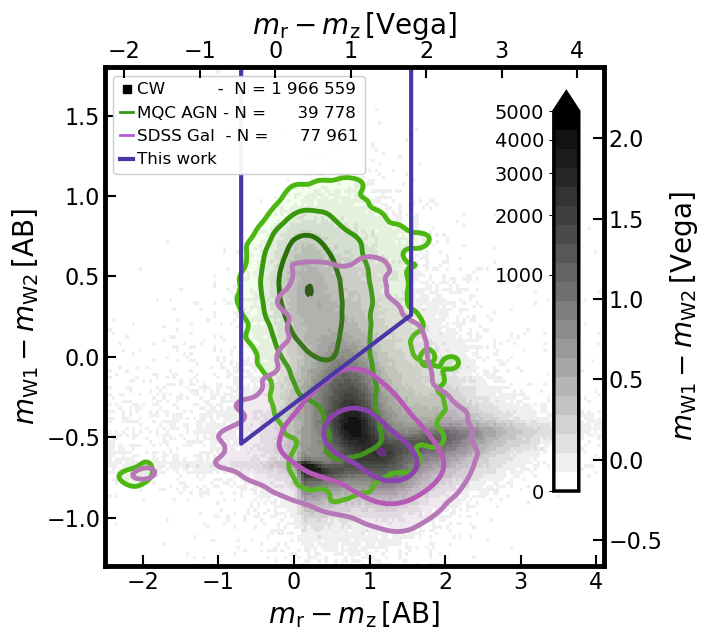

In [53]:
if not dens_clb_in:
    fig                = plt.figure(figsize=(9,6.5))
if dens_clb_in:
    fig                = plt.figure(figsize=(7.2,6.5))
ax1                = fig.add_subplot(111, xscale='linear', yscale='linear', projection='scatter_density')

num_levels_dens    = 20
cmap_dens          = 'cet_gray_r'
cmap_cont          = 'cet_CET_R3'
cmap_agn           = 'cet_CET_C9'

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    if type_of_levels  == 'linear':
        contour_levels_HETDEX = np.linspace(5, 10**(np.log10(np.nanmax(dens_agn_HETDEX.get_array()))),\
                                            num_contour_levels_HETDEX)
    if type_of_levels  == 'log':
        contour_levels_HETDEX = np.logspace(np.log10(5),  np.log10(np.nanmax(dens_agn_HETDEX.get_array())),\
                                            num_contour_levels_HETDEX)
    contour_levels_HETDEX[num_contour_levels_HETDEX - 1] -= contour_levels_HETDEX[num_contour_levels_HETDEX - 1] %\
                                                    10**np.floor(np.log10(contour_levels_HETDEX[num_contour_levels_HETDEX - 1]))
    contour_levels_HETDEX = np.unique(np.ceil(contour_levels_HETDEX))
    
AB_lims_x          = (-2.5, 4.1)  # (-2.5, 6.1)
AB_lims_y          = (-1.3, 1.8)  # (-1.3, 1.7)


norm_val  = mcolors.CenteredNorm(vcenter=0.5)
norm_dens = ImageNormalize(vmin=0, vmax=5000, stretch=PowerStretch(0.35))

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    norm_cont      = ImageNormalize(vmin=contour_levels_HETDEX[0], vmax=contour_levels_HETDEX[-1], stretch=PowerStretch(0.35))

filt_bands         = np.array(full_catalog_HETDEX_df.loc[:, 'rmag']     != mag_cols_lim['rmag'])     &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'zmag']     != mag_cols_lim['zmag'])     &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM']) &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'W2mproPM'] != mag_cols_lim['W2mproPM'])

filt_plot          = np.isfinite(full_catalog_HETDEX_df.loc[:, 'rmag']     - full_catalog_HETDEX_df.loc[:, 'zmag']) &\
                     np.isfinite(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] - full_catalog_HETDEX_df.loc[:, 'W2mproPM'])

dens_plot_data_x = (full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'rmag'] -\
                    full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'zmag'])[filt_plot]
dens_plot_data_y = (full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'W1mproPM'] -\
                    full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'W2mproPM'])[filt_plot]

dens_CW_HETDEX      = ax1.scatter_density(dens_plot_data_x, dens_plot_data_y,
                             cmap=plt.get_cmap(cmap_dens, num_levels_dens),
                             zorder=0, dpi=30, norm=norm_dens, alpha=1.0)
n_sources_HETDEX = int(np.nansum(dens_agn_HETDEX.get_array()))
n_sources_CW     = int(np.nansum(filt_bands[filt_plot]))

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    xx_agn = np.linspace(dens_agn_HETDEX.get_extent()[0],\
                         dens_agn_HETDEX.get_extent()[1],\
                         np.shape(dens_agn_HETDEX.get_array())[1])
    yy_agn = np.linspace(dens_agn_HETDEX.get_extent()[2],\
                         dens_agn_HETDEX.get_extent()[3],\
                         np.shape(dens_agn_HETDEX.get_array())[0])

    # cont_HETDEX = ax1.contour(xx_agn, yy_agn, np.flipud(dens_agn_HETDEX.get_array()), levels=contour_levels_HETDEX,\
    #                      linewidths=4.0, cmap=plt.get_cmap(cmap_cont), linestyles='dashed', zorder=3, norm=norm_cont)
    # ax1.annotate(text=f'N = {n_sources_HETDEX}', xy=(0.5, 0.96), xycoords='axes fraction',\
    #              fontsize=18, ha='center', va='top', path_effects=gf.pe2, zorder=11)
    corner_HETDEX = ChainConsumer()\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_AGN_filter * filt_plot_HETDEX, ['r_z', 'W1_W2']], name='HETDEX MQC AGN')\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_gal_filter * filt_plot_HETDEX, ['r_z', 'W1_W2']], name='HETDEX SDSS Galaxies')\
        .configure(shade=True, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)),\
                                        mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))], sigmas=[0.01, 1, 2, 3],\
                   linewidths=3.5, shade_alpha=0.075)\
        .plotter.plot_contour(ax=ax1, parameter_x='r_z', parameter_y='W1_W2')  # Green AGN

ax1.plot([-3], [-3], marker='s', ls='None', c=plt.get_cmap(cmap_dens)(1.1),    label=f'CW          -  N = {n_sources_CW:,}'.replace(',',' '), zorder=0)
if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    ax1.plot([-3], [-3], marker=None, ls='-', lw=2.0, c=plt.get_cmap('cet_CET_D2')(0.0),\
             label=f'MQC AGN - N =      {np.sum(HETDEX_AGN_filter * filt_plot_HETDEX):,}'.replace(',',' '), zorder=0)
    ax1.plot([-3], [-3], marker=None, ls='-', lw=2.0, c=plt.get_cmap('cet_CET_D2')(1.0),\
             label=f'SDSS Gal  - N =      {np.sum(HETDEX_gal_filter * filt_plot_HETDEX):,}'.replace(',',' '), zorder=0)

if not dens_clb_in:
    clb = plt.colorbar(dens_1, extend='neither', pad=0.15)
    clb.formatter.set_powerlimits((0, 0))
    clb.ax.tick_params(labelsize=14)
    clb.ax.yaxis.get_offset_text().set_fontsize(14)
    clb.ax.yaxis.set_offset_position('right')
    clb.ax.yaxis.get_offset_text().set_position((0,0))
    clb.outline.set_linewidth(2.5)
    clb.update_ticks()
    clb.ax.set_ylabel('Elements per pixel', size=16, path_effects=pe2, labelpad=-2)
    ax1.set_xlim(left=AB_lims_x[0], right=AB_lims_x[1])
    ax1.set_ylim(bottom=AB_lims_y[0], top=AB_lims_y[1])
    ax1.legend(loc=2, fontsize=14, ncol=3, columnspacing=.5, handletextpad=0.2, handlelength=0.8)

# vega_shift     = {'W1mproPM': 2.699, 'W2mproPM': 3.339, 'W1mag': 2.699, 'W2mag': 3.339, 'W3mag': 5.174,\
#                   'W4mag': 6.620, 'Jmag': 0.910, 'Hmag': 1.390, 'Kmag': 1.850, 'gmag': 0.4810,\
#                     'rmag': 0.6170, 'imag': 0.7520, 'zmag': 0.8660, 'ymag': 0.9620}

# Colorbar density
if dens_clb_in:
    axins0 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                        loc=1, bbox_to_anchor=(0.9, 0.15, 0.05, 0.80), borderpad=0)
    
    clb_dens    = fig.colorbar(dens_CW_HETDEX, cax=axins0, orientation='vertical',\
                     cmap=plt.get_cmap(cmap_dens, num_levels_dens), norm=norm_dens, extend='max')
    axins0.yaxis.set_ticks_position('left')
    clb_dens.ax.tick_params(labelsize=14)
    clb_dens.outline.set_linewidth(2.5)
    # clb_dens.ax.set_ylabel('Elements per pixel', size=12, path_effects=pe2)
##

# Colorbar contour
# axins1 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
#                     loc=3, bbox_to_anchor=(0.06, 0.07, 0.80, 0.05), borderpad=0)
# sm = plt.cm.ScalarMappable(norm=norm_cont, cmap=cont_HETDEX.cmap)
# sm.set_array([])
# clb_cont    = fig.colorbar(sm, cax=axins1, orientation='horizontal', ticks=cont_HETDEX.levels)
# axins1.xaxis.set_ticks_position('bottom')
# clb_cont.ax.tick_params(labelsize=14)
# clb_cont.outline.set_linewidth(2.5)
##

ax1.set_xlim(AB_lims_x)
ax1.set_ylim(AB_lims_y)

x_Vega   = np.array(AB_lims_x) - 0.617 + 0.866  # Vega
y_Vega   = np.array(AB_lims_y) - 2.699 + 3.339  # Vega
# Blecha+2018
points_B18 = np.array([[-0.45, -0.45, 1.8, 1.8], [y_Vega[-1], 0.1, 0.9, y_Vega[-1]]])
ax1.plot(points_B18[0] + 0.617 - 0.866, points_B18[1] + 2.699 - 3.339,
         label='This work', c=plt.get_cmap(cmap_agn)(0.75), zorder=2, lw=3)

ax2 = ax1.twinx()
ax2.set_ylim(tuple(np.array(ax1.get_ylim()) - 2.699 + 3.339))
ax2.tick_params(which='both', top=False, right=True, direction='in')
ax2.tick_params(which='both', bottom=False, left=False, direction='in')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(which='major', length=8, width=1.5)
ax2.tick_params(which='minor', length=4, width=1.5)
ax2.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[Vega]}$', size=20)

ax3 = ax1.twiny()
ax3.set_xlim(tuple(np.array(ax1.get_xlim()) - 0.617 + 0.866))
ax3.tick_params(which='both', top=True, right=False, direction='in')
ax3.tick_params(which='both', bottom=False, left=False, direction='in')
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(which='major', length=8, width=1.5)
ax3.tick_params(which='minor', length=4, width=1.5)
ax3.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[Vega]}$', size=20)

ax1.tick_params(which='both', top=False, right=False, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[AB]}$', size=20)
ax1.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[AB]}$', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
ax1.legend(loc=2, fontsize=12, ncol=1, columnspacing=.5, handletextpad=0.2, handlelength=0.8, framealpha=0.95)
plt.tight_layout()
if save_plot_flag:
    plt.savefig(gv.plots_path + f'r_z_W1_W2_AGN_gal_HETDEX_{HETDEX_subset}{imp_string}.pdf', bbox_inches='tight')
plt.show()

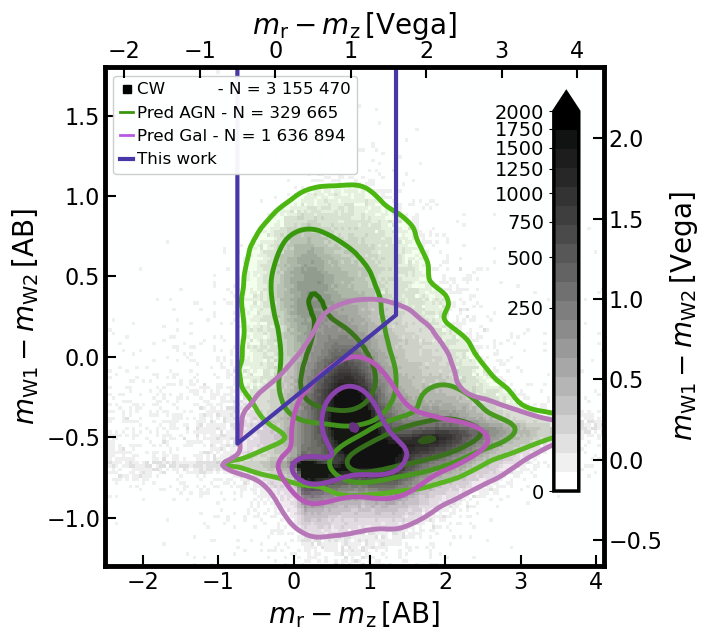

In [49]:
if not dens_clb_in:
    fig                = plt.figure(figsize=(9,6.5))
if dens_clb_in:
    fig                = plt.figure(figsize=(7.2,6.5))
ax1                = fig.add_subplot(111, xscale='linear', yscale='linear', projection='scatter_density')

num_levels_dens    = 20
cmap_dens          = 'cet_gray_r'
cmap_cont          = 'cet_CET_R3'
cmap_agn           = 'cet_CET_C9'

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    if type_of_levels  == 'linear':
        contour_levels_HETDEX = np.linspace(5, 10**(np.log10(np.nanmax(dens_agn_HETDEX.get_array()))),\
                                            num_contour_levels_HETDEX)
    if type_of_levels  == 'log':
        contour_levels_HETDEX = np.logspace(np.log10(5),  np.log10(np.nanmax(dens_agn_HETDEX.get_array())),\
                                            num_contour_levels_HETDEX)
    contour_levels_HETDEX[num_contour_levels_HETDEX - 1] -= contour_levels_HETDEX[num_contour_levels_HETDEX - 1] %\
                                                    10**np.floor(np.log10(contour_levels_HETDEX[num_contour_levels_HETDEX - 1]))
    contour_levels_HETDEX = np.unique(np.ceil(contour_levels_HETDEX))

AB_lims_x          = (-2.5, 4.1)  # (-2.5, 6.1)
AB_lims_y          = (-1.3, 1.8)  # (-1.3, 1.7)


norm_val  = mcolors.CenteredNorm(vcenter=0.5)
norm_dens = ImageNormalize(vmin=0, vmax=2000, stretch=PowerStretch(0.35))

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    norm_cont      = ImageNormalize(vmin=contour_levels_HETDEX[0], vmax=contour_levels_HETDEX[-1], stretch=PowerStretch(0.35))

filt_bands         = np.array(full_catalog_HETDEX_df.loc[:, 'rmag']     != mag_cols_lim['rmag'])     &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'zmag']     != mag_cols_lim['zmag'])     &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM']) &\
                     np.array(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM'])

filt_plot          = np.isfinite(full_catalog_HETDEX_df.loc[:, 'rmag']     - full_catalog_HETDEX_df.loc[:, 'zmag']) &\
                     np.isfinite(full_catalog_HETDEX_df.loc[:, 'W1mproPM'] - full_catalog_HETDEX_df.loc[:, 'W2mproPM'])

dens_plot_data_x = (full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'rmag'] -\
                    full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'zmag'])[filt_plot]
dens_plot_data_y = (full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'W1mproPM'] -\
                    full_catalog_HETDEX_df.loc[filt_plot_HETDEX, 'W2mproPM'])[filt_plot]

dens_CW_HETDEX      = ax1.scatter_density(dens_plot_data_x, dens_plot_data_y,
                             cmap=plt.get_cmap(cmap_dens, num_levels_dens),
                             zorder=0, dpi=30, norm=norm_dens, alpha=1.0)
n_sources_HETDEX = int(np.nansum(dens_agn_HETDEX.get_array()))
n_sources_CW     = int(np.nansum(filt_bands[filt_plot]))

if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    xx_agn = np.linspace(dens_agn_HETDEX.get_extent()[0],\
                         dens_agn_HETDEX.get_extent()[1],\
                         np.shape(dens_agn_HETDEX.get_array())[1])
    yy_agn = np.linspace(dens_agn_HETDEX.get_extent()[2],\
                         dens_agn_HETDEX.get_extent()[3],\
                         np.shape(dens_agn_HETDEX.get_array())[0])

    # cont_HETDEX = ax1.contour(xx_agn, yy_agn, np.flipud(dens_agn_HETDEX.get_array()), levels=contour_levels_HETDEX,\
    #                      linewidths=4.0, cmap=plt.get_cmap(cmap_cont), linestyles='dashed', zorder=3, norm=norm_cont)
    # ax1.annotate(text=f'N = {n_sources_HETDEX}', xy=(0.5, 0.96), xycoords='axes fraction',\
    #              fontsize=18, ha='center', va='top', path_effects=gf.pe2, zorder=11)
    corner_HETDEX = ChainConsumer()\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pAGN_filter * filt_plot_HETDEX, ['r_z', 'W1_W2']], name='HETDEX predicted AGN')\
        .add_chain(full_catalog_HETDEX_df.loc[HETDEX_pgal_filter * filt_plot_HETDEX, ['r_z', 'W1_W2']], name='HETDEX predicted Galaxies')\
        .configure(shade=True, colors=[mcolors.to_hex(plt.get_cmap('cet_CET_D2')(0.0)),\
                                        mcolors.to_hex(plt.get_cmap('cet_CET_D2')(1.0))], sigmas=[0.01, 1, 2, 3],\
                   linewidths=3.5, shade_alpha=0.075)\
        .plotter.plot_contour(ax=ax1, parameter_x='r_z', parameter_y='W1_W2')  # Green AGN

ax1.plot([-3], [-3], marker='s', ls='None', c=plt.get_cmap(cmap_dens)(1.1),    label=f'CW          - N = {n_sources_CW:,}'.replace(',',' '), zorder=0)
if np.sum(filt_agn_HETDEX & filt_plot_HETDEX) > 0:
    ax1.plot([-3], [-3], marker=None, ls='-', lw=2.0, c=plt.get_cmap('cet_CET_D2')(0.0),\
             label=f'Pred AGN - N = {np.sum(HETDEX_pAGN_filter * filt_plot_HETDEX):,}'.replace(',',' '), zorder=0)
    ax1.plot([-3], [-3], marker=None, ls='-', lw=2.0, c=plt.get_cmap('cet_CET_D2')(1.0),\
             label=f'Pred Gal - N = {np.sum(HETDEX_pgal_filter * filt_plot_HETDEX):,}'.replace(',',' '), zorder=0)

if not dens_clb_in:
    clb = plt.colorbar(dens_1, extend='neither', pad=0.15)
    clb.formatter.set_powerlimits((0, 0))
    clb.ax.tick_params(labelsize=14)
    clb.ax.yaxis.get_offset_text().set_fontsize(14)
    # clb.ax.yaxis.set_offset_position('right')
    clb.ax.yaxis.get_offset_text().set_position((0,0))
    clb.outline.set_linewidth(2.5)
    clb.update_ticks()
    clb.ax.set_ylabel('Elements per pixel', size=16, path_effects=pe2, labelpad=-2)
    ax1.set_xlim(left=AB_lims_x[0], right=AB_lims_x[1])
    ax1.set_ylim(bottom=AB_lims_y[0], top=AB_lims_y[1])
    ax1.legend(loc=2, fontsize=14, ncol=3, columnspacing=.5, handletextpad=0.2, handlelength=0.8)

# vega_shift     = {'W1mproPM': 2.699, 'W2mproPM': 3.339, 'W1mag': 2.699, 'W2mag': 3.339, 'W3mag': 5.174,\
#                   'W4mag': 6.620, 'Jmag': 0.910, 'Hmag': 1.390, 'Kmag': 1.850, 'gmag': 0.4810,\
#                     'rmag': 0.6170, 'imag': 0.7520, 'zmag': 0.8660, 'ymag': 0.9620}

# Colorbar density
if dens_clb_in:
    axins0 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                        loc=1, bbox_to_anchor=(0.9, 0.15, 0.05, 0.80), borderpad=0)
    
    clb_dens    = fig.colorbar(dens_CW_HETDEX, cax=axins0, orientation='vertical',\
                     cmap=plt.get_cmap(cmap_dens, num_levels_dens), norm=norm_dens, extend='max')
    axins0.yaxis.set_ticks_position('left')
    clb_dens.ax.tick_params(labelsize=14)
    clb_dens.outline.set_linewidth(2.5)
    # clb_dens.ax.set_ylabel('Elements per pixel', size=12, path_effects=pe2)
##

# Colorbar contour
# axins1 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
#                     loc=3, bbox_to_anchor=(0.06, 0.07, 0.80, 0.05), borderpad=0)
# sm = plt.cm.ScalarMappable(norm=norm_cont, cmap=cont_HETDEX.cmap)
# sm.set_array([])
# clb_cont    = fig.colorbar(sm, cax=axins1, orientation='horizontal', ticks=cont_HETDEX.levels)
# axins1.xaxis.set_ticks_position('bottom')
# clb_cont.ax.tick_params(labelsize=14)
# clb_cont.outline.set_linewidth(2.5)
##

ax1.set_xlim(AB_lims_x)
ax1.set_ylim(AB_lims_y)

x_Vega   = np.array(AB_lims_x) - 0.617 + 0.866  # Vega
y_Vega   = np.array(AB_lims_y) - 2.699 + 3.339  # Vega
# Blecha+2018
points_B18 = np.array([[-0.5, -0.5, 1.6, 1.6], [y_Vega[-1], 0.1, 0.9, y_Vega[-1]]])
ax1.plot(points_B18[0] + 0.617 - 0.866, points_B18[1] + 2.699 - 3.339,
         label='This work', c=plt.get_cmap(cmap_agn)(0.75), zorder=2, lw=3)

ax2 = ax1.twinx()
ax2.set_ylim(tuple(np.array(ax1.get_ylim()) - 2.699 + 3.339))
ax2.tick_params(which='both', top=False, right=True, direction='in')
ax2.tick_params(which='both', bottom=False, left=False, direction='in')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(which='major', length=8, width=1.5)
ax2.tick_params(which='minor', length=4, width=1.5)
ax2.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[Vega]}$', size=20)

ax3 = ax1.twiny()
ax3.set_xlim(tuple(np.array(ax1.get_xlim()) - 0.617 + 0.866))
ax3.tick_params(which='both', top=True, right=False, direction='in')
ax3.tick_params(which='both', bottom=False, left=False, direction='in')
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(which='major', length=8, width=1.5)
ax3.tick_params(which='minor', length=4, width=1.5)
ax3.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[Vega]}$', size=20)

ax1.tick_params(which='both', top=False, right=False, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$m_{\mathrm{r}} - m_{\mathrm{z}}\, \mathrm{[AB]}$', size=20)
ax1.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[AB]}$', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
ax1.legend(loc=2, fontsize=12, ncol=1, columnspacing=.5, handletextpad=0.2, handlelength=0.8, framealpha=0.95)
plt.tight_layout()
if save_plot_flag:
    plt.savefig(gv.plots_path + f'r_z_W1_W2_pred_AGN_gal_HETDEX_{HETDEX_subset}{imp_string}.pdf', bbox_inches='tight')
plt.show()